### Loading all data files into pandas dataframe

In [1]:
#Import Word2Vec
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load_word2vec_format('C:\Users\jac812i\Downloads\GoogleNews-vectors-negative300.bin.gz', binary=True)

C:\Users\jac812i\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim-0.13.3-py2.7-win-amd64.egg\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\jac812i\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim-0.13.3-py2.7-win-amd64.egg\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
%run spellcheckdict.ipynb
%run manualcheckdict.ipynb
%run externalsourcedictonary.ipynb

In [5]:
#Reading all the input files into a panda dataframe

import pandas as pd
#from sklearn.feature_extraction.text import CountVectorizer
#pd.set_option('max_rows', 10)
#pd.set_option('display.max_colwidth', -1)

train = pd.read_csv("train.csv",index_col='id')
test = pd.read_csv("test.csv",index_col='id')
attributes = pd.read_csv("attributes.csv")
productdescriptions = pd.read_csv("product_descriptions.csv")



#print "train data"
#train.head()
#train.shape
#print test.count



# Statistics

In [6]:
train.count()
print "Total number of product_uids in train data %d" %train['product_uid'].count()
print "Total number of unique product_uids in train data %d" %train['product_uid'].nunique()
print "Total number of search_terms in train data %d" %train['search_term'].count()
print "Total number of unique search_terms in train data %d" %train['search_term'].nunique()
print "Total number of unique relevance scores in train data %d" %train['relevance'].nunique()




Total number of product_uids in train data 74067
Total number of unique product_uids in train data 54667
Total number of search_terms in train data 74067
Total number of unique search_terms in train data 11795
Total number of unique relevance scores in train data 13


In [7]:
s1 = pd.merge(train, test, how='left', on=['product_uid'])
s2 = pd.merge(train, test, how='right', on=['product_uid'])
s3 = pd.merge(train, test, how='left', on=['search_term'])
s4 = pd.merge(train, test, how='right', on=['search_term'])

In [8]:
s1.count()

product_uid        188313
product_title_x    188313
search_term_x      188313
relevance          188313
product_title_y    158454
search_term_y      158454
dtype: int64

In [9]:
s1.head(6)

,product_uid,product_title_x,search_term_x,relevance,product_title_y,search_term_y
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668
5,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,Simpson Strong-Tie 12-Gauge Angle,wood connectors


In [10]:
s1.dropna(inplace=True)
s2.dropna(inplace=True)
s3.dropna(inplace=True)
s4.dropna(inplace=True)

In [11]:
s1.count()

product_uid        158454
product_title_x    158454
search_term_x      158454
relevance          158454
product_title_y    158454
search_term_y      158454
dtype: int64

In [12]:
s1['product_uid'].nunique()

27699

In [13]:
print "Number of productid in train but not in test %d" %(train['product_uid'].nunique()-s1['product_uid'].nunique())
print "Number of productid in test but not in train %d" %(test['product_uid'].nunique()-s2['product_uid'].nunique())
print "Number of search_term in train but not in test %d" %(train['search_term'].nunique()-s3['search_term'].nunique())
print "Number of search_term in test but not in train %d" %(test['search_term'].nunique()-s4['search_term'].nunique())

Number of productid in train but not in test 26968
Number of productid in test but not in train 69761
Number of search_term in train but not in test 2174
Number of search_term in test but not in train 12806


In [14]:
#Number of unique product id's in training set
train.apply(pd.Series.nunique)

product_uid      54667
product_title    53489
search_term      11795
relevance           13
dtype: int64

In [15]:
test.count()

product_uid      166693
product_title    166693
search_term      166693
dtype: int64

In [16]:
print "Total number of product_uids in test data %d" %test['product_uid'].count()
print "Total number of unique product_uids in test data %d" %test['product_uid'].nunique()
print "Total number of search_terms in test data %d" %test['search_term'].count()
print "Total number of unique search_terms in test data %d" %test['search_term'].nunique()


Total number of product_uids in test data 166693
Total number of unique product_uids in test data 97460
Total number of search_terms in test data 166693
Total number of unique search_terms in test data 22427


In [17]:
#Total number of unique product_uids in train but not in test
#Total number of unique search_terms in train but not in test


In [18]:
#Number of pid in train not in test 

In [19]:
test.apply(pd.Series.nunique)

product_uid      97460
product_title    94731
search_term      22427
dtype: int64

In [20]:
df_all = pd.concat([train,test])
df_all.head(1)

,product_title,product_uid,relevance,search_term
id,,,,
2,Simpson Strong-Tie 12-Gauge Angle,100001,3.0,angle bracket


In [21]:
df_all.count()

product_title    240760
product_uid      240760
relevance         74067
search_term      240760
dtype: int64

In [22]:
df_all.apply(pd.Series.nunique)

product_title    120453
product_uid      124428
relevance            13
search_term       24601
dtype: int64

In [23]:
#Number of unique relevance values
train['relevance'].unique()

array([ 3.  ,  2.5 ,  2.33,  2.67,  2.  ,  1.  ,  1.67,  1.33,  1.25,
        2.75,  1.75,  1.5 ,  2.25])

In [24]:
#how many count of productids in train has differente relevance values
print_full(train.groupby(['relevance'])['product_uid'].count())


relevance
1.00     2105
1.25        4
1.33     3006
1.50        5
1.67     6780
1.75        9
2.00    11730
2.25       11
2.33    16060
2.50       19
2.67    15202
2.75       11
3.00    19125
Name: product_uid, dtype: int64


In [25]:
train_stats = train.groupby(['relevance'])['product_uid'].count().to_frame().reset_index()

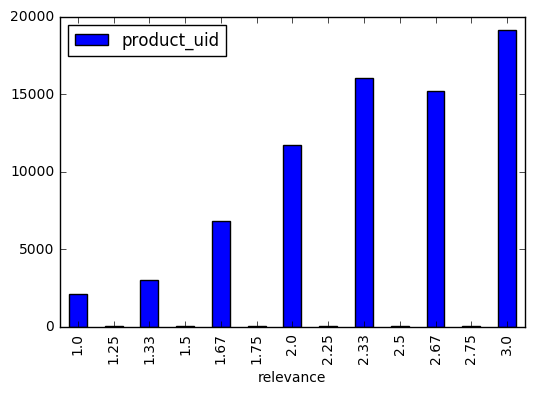

In [26]:
train_stats.plot(kind='bar', x='relevance', y='product_uid')

In [27]:
train_stats = train.groupby(['relevance'])['search_term'].count().to_frame().reset_index()

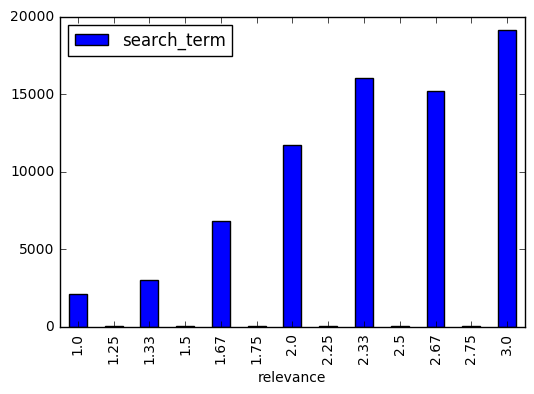

In [28]:
train_stats.plot(kind='bar', x='relevance', y='search_term')

In [29]:
#How many productids in train but not in test
mergestattrain1 = pd.merge(train, test, on='product_uid', how='left')

In [30]:
mergestattrain1.isnull().sum().sum()

59718L

## Data Preprocessing


In [31]:
# Apply get method and see if a value in dictionary exists for key if so replaces the value for that key from dictionary, 
#if no value exists for that key in disctionary it will just use the key as value.

spellchecker = lambda x: spell_check_dict.get(x,x)
print spell_check_dict.get('gas mowe','gas mowe')

gas mower


In [32]:
print_full(df_all['search_term'][10:11])

id
34    steele stake
Name: search_term, dtype: object


In [33]:
#Update the search_term by looking for replacements in the below dictionaries

df_all['search_term'] = df_all['search_term'].apply(lambda x: spell_check_dict.get(x,x))
df_all['search_term'] = df_all['search_term'].apply(lambda x: manualcheckdict.get(x,x))
df_all['search_term'] = df_all['search_term'].apply(lambda x: another_replacement_dict.get(x,x))
df_all['search_term'] = df_all['search_term'].apply(lambda x: external_data_dict.get(x,x))

In [34]:
#Now you can see the spell check correction is done compared to above when we ran the same command
print_full(df_all['search_term'][10:11])

id
34    steel stake
Name: search_term, dtype: object


In [35]:
train.head(3)

,product_uid,product_title,search_term,relevance
id,,,,
2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0
3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5
9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.0


### to remove x from 2x4 in search term

In [36]:
#This function will check if the values contain x for example 2x4 it will remove x.
#since in Home Depot most of the products have this type of values I created this function

import re

def removex(words):
    m = re.match(r"(\w*?)(\s*?)(\d+x*?\d+)",words)
   
    if m:
        word = re.sub(r'[x]', " ",words)
    else:
        word = words
    
    return word

removex('2x4')

'2 4'

In [37]:
#This function will check if the values contain * for example 2x4 it will remove x.
#since in Home Depot most of the products have this type of values I created this function

def removestar(words):
    j = re.match(r"(\w*?)(\s*?)(\d+[*]?\d+)",words)
    if j:
        word = re.sub(r'[*]', " ",words)
    else:
        word = words
    return word

removestar ('2*4')

'2 4'

In [38]:

#In attributes file the name column contain some of these generic values which dont add any importance 
#I am replacing the generic attributes with nothing and some of the values like product Depth (in.) to inch 
#so that if any search term has inch mentioned it might have some relevance if attributes has also inch


def removeattributebullet(s):
    s = str(s)
    s = s.replace("Bullet01","")
    s = s.replace("Bullet02","")
    s = s.replace("Bullet03","")
    s = s.replace("Bullet04","")
    s = s.replace("Bullet05","")
    s = s.replace("Bullet06","")
    s = s.replace("Bullet07","")
    s = s.replace("Bullet08","")
    s = s.replace("Bullet09","")
    s = s.replace("Bullet10","")
    s = s.replace("Bullet11","")
    s = s.replace("Bullet12","")
    s = s.replace("Bullet13","")
    s = s.replace("Bullet14","")
    s = s.replace("Bullet15","")
    s = s.replace("Bullet16","")
    s = s.replace("Bullet17","")
    s = s.replace("Bullet18","")
    s = s.replace("Bullet19","")
    s = s.replace("Bullet20","")
    s = s.replace("Product Depth (in.)","inch")
    s = s.replace("Product Height (in.)","inch")
    s = s.replace("Product Weight (lb.)","pound")
    s = s.replace("Product Width (in.)","inch")
    s = s.replace("Assembled Depth (in.)","inch")
    s = s.replace("Assembled Height (in.)","inch")
    s = s.replace("Assembled Width (in.)","inch")
    s = s.replace("MFG Brand Name","")
    return s
   
print removeattributebullet('Bullet01') #This one will print nothing
print removeattributebullet('Product Depth (in.)')



inch


In [39]:
print(df_all['search_term'][22:24])

id
90    4*8 beadboard paneling
92          4x8wood paneling
Name: search_term, dtype: object


In [40]:
#Below is to apply removex and removestart functions on all search_term values

df_all['search_term'] = df_all['search_term'].apply(removex)
df_all['search_term'] = df_all['search_term'].apply(removestar)




In [41]:
#Below results show where x and * is removed compared to same command ran above
print(df_all['search_term'][22:24])

id
90    4 8 beadboard paneling
92          4 8wood paneling
Name: search_term, dtype: object


In [42]:
#Below results show where x and * is removed compared to same command ran above
print(df_all['search_term'][58:59])

id
202    12 in.  16 in single track brackets
Name: search_term, dtype: object


In [43]:
def changevalues(s):
    
    s = s.replace(" in."," inch ")
    s = s.replace(" in "," inch ")
    s = s.replace(" ft."," feet ")
    s = s.replace(" ft "," feet ")
    s = s.replace(" lb."," pound ")
    s = s.replace(" lb "," pound ")
    s = s.replace(" sq."," square ")
    s = s.replace(" sq "," square ")
    s = s.replace(" cu."," cubic ")
    s = s.replace(" cu "," cubic ")
    s = s.replace(" gal."," gallon ")
    s = s.replace(" gal "," gallon ")
    s = s.replace(" oz."," ounce ")
    s = s.replace(" oz "," ounce ")
    s = s.replace(" cm."," centimeter ")
    s = s.replace(" cm "," centimeter ")
    s = s.replace(" mm."," millimeter")
    s = s.replace(" mm "," millimeter ")
    s = s.replace(" amp."," amp ")
    s = s.replace(" v. "," volt ")
    s = s.replace(" w. ", " watt ")
    s = s.replace("\dx\d", "\d \d")
    return s

changevalues(' in. ')


' inch  '

In [44]:
df_all['search_term'] = df_all['search_term'].map(lambda x:changevalues(x))


In [45]:
#Below shows in. is converted to inch compared to running the same command above
print(df_all['search_term'][58:59])

id
202    12 inch   16 inch single track brackets
Name: search_term, dtype: object


In [46]:
"""
def spell_correction(s):
    s = s.replace("craftsm,an","craftsman")        
    s = re.sub(r'depot.com/search=', '', s)
    s = re.sub(r'pilers,needlenose', 'pliers, needle nose', s)    
    
    s=s.replace("ttt","tt")    
    s=s.replace("lll","ll") 
    s=s.replace("nnn","nn") 
    s=s.replace("rrr","rr") 
    s=s.replace("sss","ss") 
    s=s.replace("zzz","zz")
    s=s.replace("ccc","cc")
    s=s.replace("eee","ee")
    
    s=s.replace("acccessories","accessories")
    s=re.sub(r'\bscott\b', 'scotts', s) #brand
    s=re.sub(r'\borgainzer\b', 'organizer', s)
    s=re.sub(r'\bshark bite\b', 'sharkbite',s)
    
    s=s.replace("hinges with pishinges with pins","hinges with pins")    
    s=s.replace("virtue usa","virtu usa")
    s=re.sub('outdoor(?=[a-rt-z])', 'outdoor ', s)
    s=re.sub(r'\bdim able\b',"dimmable", s) 
    s=re.sub(r'\blink able\b',"linkable", s)
    s=re.sub(r'\bm aple\b',"maple", s)
    s=s.replace("aire acondicionado", "air conditioner")
    s=s.replace("borsh in dishwasher", "bosch dishwasher")
    s=re.sub(r'\bapt size\b','appartment size', s)
    s=re.sub(r'\barm[e|o]r max\b','armormax', s)
    s=re.sub(r' ss ',' stainless steel ', s)
    s=re.sub(r'\bmay tag\b','maytag', s)
    s=re.sub(r'\bback blash\b','backsplash', s)
    s=re.sub(r'\bbum boo\b','bamboo', s)
    s=re.sub(r'(?<=[0-9] )but\b','btu', s)
    s=re.sub(r'\bcharbroi l\b','charbroil', s)
    s=re.sub(r'\bair cond[it]*\b','air conditioner', s)
    s=re.sub(r'\bscrew conn\b','screw connector', s)
    s=re.sub(r'\bblack decker\b','black and decker', s)
    s=re.sub(r'\bchristmas din\b','christmas dinosaur', s)
    s=re.sub(r'\bdoug fir\b','douglas fir', s)
    s=re.sub(r'\belephant ear\b','elephant ears', s)
    s=re.sub(r'\bt emp gauge\b','temperature gauge', s)
    s=re.sub(r'\bsika felx\b','sikaflex', s)
    s=re.sub(r'\bsquare d\b', 'squared', s)
    s=re.sub(r'\bbehring\b', 'behr', s)
    s=re.sub(r'\bcam\b', 'camera', s)
    s=re.sub(r'\bjuke box\b', 'jukebox', s)
    s=re.sub(r'\brust o leum\b', 'rust oleum', s)
    s=re.sub(r'\bx mas\b', 'christmas', s)
    s=re.sub(r'\bmeld wen\b', 'jeld wen', s)
    s=re.sub(r'\bg e\b', 'ge', s)
    s=re.sub(r'\bmirr edge\b', 'mirredge', s)
    s=re.sub(r'\bx ontrol\b', 'control', s)
    s=re.sub(r'\boutler s\b', 'outlets', s)
    s=re.sub(r'\bpeep hole', 'peephole', s)
    s=re.sub(r'\bwater pik\b', 'waterpik', s)
    s=re.sub(r'\bwaterpi k\b', 'waterpik', s)
    s=re.sub(r'\bplex[iy] glass\b', 'plexiglass', s)
    s=re.sub(r'\bsheet rock\b', 'sheetrock',s)
    s=re.sub(r'\bgen purp\b', 'general purpose',s)
    s=re.sub(r'\bquicker crete\b', 'quikrete',s)
    s=re.sub(r'\bref ridge\b', 'refrigerator',s)
    s=re.sub(r'\bshark bite\b', 'sharkbite',s)
    s=re.sub(r'\buni door\b', 'unidoor',s)
    s=re.sub(r'\bair tit\b','airtight', s)
    s=re.sub(r'\bde walt\b','dewalt', s)
    s=re.sub(r'\bwaterpi k\b','waterpik', s)
    s=re.sub(r'\bsaw za(ll|w)\b','sawzall', s)
    s=re.sub(r'\blg elec\b', 'lg', s)
    s=re.sub(r'\bhumming bird\b', 'hummingbird', s)
    s=re.sub(r'\bde ice(?=r|\b)', 'deice',s)  
    s=re.sub(r'\bliquid nail\b', 'liquid nails', s)  
    s=re.sub(r'\bdeck over\b','deckover', s)
    s=re.sub(r'\bcounter sink(?=s|\b)','countersink', s)
    s=re.sub(r'\bpipes line(?=s|\b)','pipeline', s)
    s=re.sub(r'\bbook case(?=s|\b)','bookcase', s)
    s=re.sub(r'\bwalkie talkie\b','2 pair radio', s)
    s=re.sub(r'(?<=^)ks\b', 'kwikset',s)
    s=re.sub('(?<=[0-9])[\ ]*ft(?=[a-z])', 'ft ', s)
    s=re.sub('(?<=[0-9])[\ ]*mm(?=[a-z])', 'mm ', s)
    s=re.sub('(?<=[0-9])[\ ]*cm(?=[a-z])', 'cm ', s)
    s=re.sub('(?<=[0-9])[\ ]*inch(es)*(?=[a-z])', 'in ', s)
    
    s=re.sub(r'(?<=[1-9]) pac\b', 'pack', s)
 
    s=re.sub(r'\bcfl bulbs\b', 'cfl light bulbs', s)
    s=re.sub(r' cfl(?=$)', ' cfl light bulb', s)
    s=re.sub(r'candelabra cfl 4 pack', 'candelabra cfl light bulb 4 pack', s)
    s=re.sub(r'\bthhn(?=$|\ [0-9]|\ [a-rtuvx-z])', 'thhn wire', s)
    s=re.sub(r'\bplay ground\b', 'playground',s)
    s=re.sub(r'\bemt\b', 'emt electrical metallic tube',s)
    s=re.sub(r'\boutdoor dining se\b', 'outdoor dining set',s)
    
     
    if "a/c" in s:
        if ('unit' in s) or ('frost' in s) or ('duct' in s) or ('filt' in s) or ('vent' in s) or ('clean' in s) or ('vent' in s) or ('portab' in s):
            s=s.replace("a/c","air conditioner")
        else:
            s=s.replace("a/c","ac")
    return s
    
"""

'\ndef spell_correction(s):\n    s = s.replace("craftsm,an","craftsman")        \n    s = re.sub(r\'depot.com/search=\', \'\', s)\n    s = re.sub(r\'pilers,needlenose\', \'pliers, needle nose\', s)    \n    \n    s=s.replace("ttt","tt")    \n    s=s.replace("lll","ll") \n    s=s.replace("nnn","nn") \n    s=s.replace("rrr","rr") \n    s=s.replace("sss","ss") \n    s=s.replace("zzz","zz")\n    s=s.replace("ccc","cc")\n    s=s.replace("eee","ee")\n    \n    s=s.replace("acccessories","accessories")\n    s=re.sub(r\'\x08scott\x08\', \'scotts\', s) #brand\n    s=re.sub(r\'\x08orgainzer\x08\', \'organizer\', s)\n    s=re.sub(r\'\x08shark bite\x08\', \'sharkbite\',s)\n    \n    s=s.replace("hinges with pishinges with pins","hinges with pins")    \n    s=s.replace("virtue usa","virtu usa")\n    s=re.sub(\'outdoor(?=[a-rt-z])\', \'outdoor \', s)\n    s=re.sub(r\'\x08dim able\x08\',"dimmable", s) \n    s=re.sub(r\'\x08link able\x08\',"linkable", s)\n    s=re.sub(r\'\x08m aple\x08\',"maple", s)\n

In [47]:
"""
df_all['search_term'] = df_all['search_term'].map(lambda x:spell_correction(x))
"""

"\ndf_all['search_term'] = df_all['search_term'].map(lambda x:spell_correction(x))\n"

In [48]:

print "Number of rows including test and train dataframe is %d"  %df_all.shape[0]
print "Number of rows in train dataframe is %d"  %train.shape[0]

trainrowcount = train.shape[0]

#Dividing df_all into train and test.
train_all = df_all[0:trainrowcount]
test_all= df_all[trainrowcount:]


print train_all.shape
print test_all.shape

Number of rows including test and train dataframe is 240760
Number of rows in train dataframe is 74067
(74067, 4)
(166693, 4)


In [49]:
df_all.iloc[10]

product_title    Valley View Industries Metal Stakes (4-Pack)
product_uid                                            100010
relevance                                                2.67
search_term                                       steel stake
Name: 34, dtype: object

### Merging attributes file and product description files based on productid and seperating brand name and material. Also concatenate attribute values for a product_id

In [50]:
print "Number of rows in product descriptions %d" %productdescriptions.shape[0]

Number of rows in product descriptions 124428


In [51]:
from IPython.display import display

# Seperate brandnames from attribute file using name column value being MFG Brand Name
brandnames = attributes.query('name == "MFG Brand Name"').reset_index(drop=True)
print "brandnames dataframe"
display(brandnames.head(2))

#Create a dataframe with no MFG brand name 
attributes_nobrandname = attributes.query('name != "MFG Brand Name"').reset_index(drop=True)
print "attributes_nobrandname"
display(attributes_nobrandname.head(2))

#Pick just the product_id and name columns so that we can use it for concatenation in next step
attributes_nobrandname_name =  attributes_nobrandname[['product_uid','name']]
print "attributes_nobrandname_name"
display(attributes_nobrandname_name.head(2))

#Concatenating all values in name column in attributes file
attributes_nobrandname_concatname = attributes_nobrandname_name.groupby(['product_uid'])['name'].apply(lambda x: ' '.join(x)).reset_index()
print "attributes_nobrandname_concatname"
display(attributes_nobrandname_concatname.head(2))



#Pick just the product_id and value columns so that we can use it for concatenation in next step
attributes_nobrandname_value =  attributes_nobrandname[['product_uid','value']]
print "attributes_nobrandname_value"
display(attributes_nobrandname_value.head(2))

#Concatenating all values in value column in attributes file
attributes_nobrandname_concatvalue = attributes_nobrandname_value.groupby(['product_uid'])['value'].apply(lambda x: ' '.join(map(str, x))).reset_index()
print "attributes_nobrandname_concatvalue"
display(attributes_nobrandname_concatvalue.head(2))

# Seperate material from attribute file using name column value being Material
materialdf = attributes.query('name == "Material"').reset_index(drop=True)
print "materialdf"
display(materialdf.head(2))

materialdf_1 =  materialdf[['product_uid','value']]
print "materialdf_1"
display(materialdf_1.head(2))


#Concatenate value of materialdf if productid has multiple materials
materialdf_1_concatvalue = materialdf_1.groupby(['product_uid'])['value'].apply(lambda x: ' '.join(map(str, x))).reset_index()
print "materialdf_1_concatvalue"
display(materialdf_1_concatvalue.head(2))


#Merging product descriptions and materialdf based on product_uid
mergematerialdf = pd.merge(productdescriptions , materialdf_1_concatvalue, on='product_uid', how='left')
print "mergematerialdf"
display(mergematerialdf.head(2))

#Merging above mergematerialdf with attributes value 
mergepdatnb = pd.merge(mergematerialdf, attributes_nobrandname_concatvalue, on='product_uid', how='left')
print "mergepdatnb"
display(mergepdatnb.head(2))

#Merging above dataframe with attributes conncat name
mergepdatnbname = pd.merge(mergepdatnb , attributes_nobrandname_concatname, on='product_uid', how='left')
print "mergepdatnbname"
display(mergepdatnbname.head(2))

#Merging above dataframe with brandnames
mergebrandnames = pd.merge(mergepdatnbname, brandnames, on='product_uid', how='left')
print "mergebrandnames"
display(mergebrandnames.head(2))

#Droping unnecessary columns and renaming some of the columns for understanding purpose
mergenonamedf =  mergebrandnames.drop('name_y', 1) # Dropping name_y as this is just a MFG Brand name default which doesnt add value
mergerenameattrnamedf = mergenonamedf.rename(columns = {'name_x':'attributesname'})
mergerenameattrdf = mergerenameattrnamedf.rename(columns = {'value_x':'attributes'})
mergerenamebranddf = mergerenameattrdf.rename(columns = {'value_y':'brandname'})

print "mergerenamebranddf"
display(mergerenamebranddf.head(2))

brandnames dataframe


,product_uid,name,value
0,100001.0,MFG Brand Name,Simpson Strong-Tie
1,100002.0,MFG Brand Name,BEHR Premium Textured DeckOver


attributes_nobrandname


,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...


attributes_nobrandname_name


,product_uid,name
0,100001.0,Bullet01
1,100001.0,Bullet02


attributes_nobrandname_concatname


,product_uid,name
0,100001.0,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...
1,100002.0,Application Method Assembled Depth (in.) Assem...


attributes_nobrandname_value


,product_uid,value
0,100001.0,Versatile connector for various 90° connection...
1,100001.0,Stronger than angled nailing or screw fastenin...


attributes_nobrandname_concatvalue


,product_uid,value
0,100001.0,Versatile connector for various 90° connection...
1,100002.0,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev..."


materialdf


,product_uid,name,value
0,100001.0,Material,Galvanized Steel
1,100003.0,Material,Composite


materialdf_1


,product_uid,value
0,100001.0,Galvanized Steel
1,100003.0,Composite


materialdf_1_concatvalue


,product_uid,value
0,100001.0,Galvanized Steel
1,100003.0,Composite


mergematerialdf


,product_uid,product_description,value
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN


mergepdatnb


,product_uid,product_description,value_x,value_y
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev..."


mergepdatnbname


,product_uid,product_description,value_x,value_y,name
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",Application Method Assembled Depth (in.) Assem...


mergebrandnames


,product_uid,product_description,value_x,value_y,name_x,name_y,value
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,MFG Brand Name,Simpson Strong-Tie
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",Application Method Assembled Depth (in.) Assem...,MFG Brand Name,BEHR Premium Textured DeckOver


mergerenamebranddf


,product_uid,product_description,attributes,brandname,attributesname,value
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",Application Method Assembled Depth (in.) Assem...,BEHR Premium Textured DeckOver


In [52]:
#Change the column name value of mergerenamebranddf to material
mergerenamebranddf_1 = mergerenamebranddf.rename(columns = {'value':'material'})
mergerenamebranddf_1.head(2)


,product_uid,product_description,attributes,brandname,attributesname,material
0,100001,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,NaN,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",Application Method Assembled Depth (in.) Assem...,BEHR Premium Textured DeckOver


### Merging all data with data frame that contains product_description and attribute details based on product_uid

In [53]:
mergedfall = pd.merge(df_all, mergerenamebranddf_1, on='product_uid', how='left')
mergedfall.head(2)


,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material
0,Simpson Strong-Tie 12-Gauge Angle,100001,3.0,angle bracket,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie
1,Simpson Strong-Tie 12-Gauge Angle,100001,2.5,l bracket,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie


In [54]:
print "number of rows in combined dataframe all (train and test) %d" %df_all.shape[0]
print "number of rows in train dataframe  %d" %train_all.shape[0]
print "number of rows in test dataframe  %d" %test_all.shape[0]
print "number of rows in merged dataframe with product description and attributes  %d" %mergedfall.shape[0]


number of rows in combined dataframe all (train and test) 240760
number of rows in train dataframe  74067
number of rows in test dataframe  166693
number of rows in merged dataframe with product description and attributes  240760


In [55]:
import unittest

class MyTest(unittest.TestCase):
    def test(self):
        print self.assertEqual(df_all.shape[0], mergedfall.shape[0])
        
#unittest.main(argv=['ignored'], exit=False)
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

None



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [56]:
#Preparing same columns from other columns so that the new columns can be raw columns with no preprocessing on those.

mergedfall['searchterm_wordvec'] = mergedfall['search_term']
mergedfall['producttitle_wordvec'] = mergedfall['product_title']
mergedfall['attributes_wordvec'] = mergedfall['attributes']
mergedfall['proddesc_wordvec'] = mergedfall['product_description']
mergedfall['brandname_wordvec'] = mergedfall['brandname']
mergedfall.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec
0,Simpson Strong-Tie 12-Gauge Angle,100001,3.0,angle bracket,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...


### Below is the code for text preprocessing

In [57]:
#This code will check if value is integer or not

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

print RepresentsInt(100)
print RepresentsInt('abc')

True
False


In [58]:
#This code will convert number to its equivalent word
import inflect
p = inflect.engine()
print p.number_to_words(100)

one hundred


In [59]:
#This code will remove stopwords 


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
def review_to_words( raw_text ):
    raw_text = str(raw_text)
    #if string contains integer dont do anything if not apply changevalues function to convert int. to integer etc
    if RepresentsInt(raw_text):
        review_text = raw_text 
    else:
        review_text = changevalues(raw_text) 
        
    # 2. Remove non-letters        
    letters_only = re.sub("[^0-9a-zA-Z]", " ", review_text) 
   
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()  
    
    
    changenumbertoword = []
    for value in words:
        if RepresentsInt(value):
            #Convert numbers to individual equivalent words like example 100 to one hundred for cosine distances
            changenumbertoword.append(p.number_to_words(value))
        else:
            changenumbertoword.append(value)
        
    words_numberchanged = ' '.join(changenumbertoword).split()
    
    
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words_numberchanged if not w in stops]   
    # 6. Remove stemmer words
    stemmer_words = [stemmer.stem(w) for w in meaningful_words]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( stemmer_words )) 
    #return( " ".join( meaningful_words ))
    #return( " ".join( words )) 


print review_to_words('Not only do angles make joints stronger 100, they also provide more consistent, straight corners')


angl make joint stronger one hundr also provid consist straight corner


In [60]:
#The code is same as above function review_to_words except that we are not removing stop words

def review_to_words_withstop( raw_text ):
    raw_text = str(raw_text)
 
    # 1. convert cu. ft. to cubic feet
    if RepresentsInt(raw_text):
        review_text = raw_text 
    else:
        review_text = changevalues(raw_text) 
        
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^0-9a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()  
    
    changenumbertoword = []
    for value in words:
        if RepresentsInt(value):
            changenumbertoword.append(p.number_to_words(value))
        else:
            changenumbertoword.append(value)
        
    words_numberchanged = ' '.join(changenumbertoword).split()
    
    
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    #stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words_numberchanged]   
    # 6. Remove stemmer words
    stemmer_words = [stemmer.stem(w) for w in meaningful_words]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( stemmer_words )) 

print review_to_words_withstop('Not only do angles make joints stronger 100, they also provide more consistent, straight corners')

not onli do angl make joint stronger one hundr they also provid more consist straight corner


In [61]:

print review_to_words(removex('1x1 rail decorative wood'))
print review_to_words(removestar('TILES 12*12'))
print review_to_words(removestar('microwaves'))
print review_to_words('Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking')

one one rail decor wood
tile twelv twelv
microwav
whirlpool one nine cubic feet rang convect microwav inch stainless steel sensor cook


In [62]:
mergedfall.iloc[17860]

product_title           Hampton Bay 1-Light Oil Rubbed Bronze Outdoor ...
product_uid                                                        114426
relevance                                                            1.67
search_term                                                            To
product_description     Use the Hampton Bay Wall-Mount 1-Light Oil Rub...
attributes                                                            NaN
brandname               CFL Yes Oil rubbed bronze finish Frosted white...
attributesname          Bulb Type Bulb(s) Included Bullet01 Bullet02 B...
material                                                      Hampton Bay
searchterm_wordvec                                                     To
producttitle_wordvec    Hampton Bay 1-Light Oil Rubbed Bronze Outdoor ...
attributes_wordvec                                                    NaN
proddesc_wordvec        Use the Hampton Bay Wall-Mount 1-Light Oil Rub...
brandname_wordvec       CFL Yes Oil ru

In [63]:
 #This function will divide the search term into multiple new terms if the word count is greater than 5

def searchwordchange(str2):
    values = str2.split()
    valueslist = []
    for stringvalue in values:
        valueslist.append(stringvalue)
        m = len(stringvalue)
        if m>5:
            t = m/2
            j = m%2
            if j == 0:
                valueslist.append(stringvalue[0:t])
                valueslist.append(stringvalue[t:])
            else:            
                valueslist.append(stringvalue[0:t])
                valueslist.append(stringvalue[0:t+1])
                valueslist.append(stringvalue[t:])
                valueslist.append(stringvalue[t+1:])
    return( " ".join( valueslist )) 


print searchwordchange('showert fauceta')
print searchwordchange('trim')



showert sho show wert ert fauceta fau fauc ceta eta
trim


In [64]:
#If number and words are combined this function will seperate number from words

def sepnumberwords(word):
    words = str(word).split()
    #print words
    
    listwords =[]
    
    for word in words:
        #print word
        t = re.match(r"(\d+\w+)",word)
        #print t
        if t:
            r = re.compile("([0-9]+)([a-zA-Z]+)([0-9]+)([a-zA-Z]+)")
            j = r.match(word)
            if j:
                listwords.append(j.group(1))
                listwords.append(j.group(2))
                listwords.append(j.group(3))
                listwords.append(j.group(4))
            else:
                r = re.compile("([0-9]+)([a-zA-Z]+)([0-9]+)")
                m = r.match(word)
                if m:
                    listwords.append(m.group(1))
                    listwords.append(m.group(2))
                    listwords.append(m.group(3))
                else:
    
                    r = re.compile("([0-9]+)([a-zA-Z]+)")
                    k = r.match(word)
                    if k:
                        listwords.append(k.group(1))
                        listwords.append(k.group(2))
                    else:
                        listwords.append(word)
            
        else:
            
            listwords.append(word)
            
    
        
    return ' '.join(listwords)

print sepnumberwords('yrdy 32ab8test snvf ')

yrdy 32 ab 8 test snvf


In [65]:
#If word and number are combined this function will seperate number from words. 
#This function is same as above function sepnumberwords if number followed by alphabet it will seperate for example x100 will seperate x and 100
def sepwordnumber(word):
    words = str(word).split()
    #print words
    
    listwords =[]
    
    for word in words:
        #print word
        t = re.match(r"(\w+\d+)",word)
        #print t
        if t:
            r = re.compile("([a-zA-Z]+)([0-9]+)([a-zA-Z]+)([0-9]+)")
            j = r.match(word)
            if j:
                listwords.append(j.group(1))
                listwords.append(j.group(2))
                listwords.append(j.group(3))
                listwords.append(j.group(4))
            else:
                r = re.compile("([a-zA-Z]+)([0-9]+)([a-zA-Z]+)")
                m = r.match(word)
                if m:
                    listwords.append(m.group(1))
                    listwords.append(m.group(2))
                    listwords.append(m.group(3))
                else:
    
                    r = re.compile("([a-zA-Z]+)([0-9]+)")
                    k = r.match(word)
                    if k:
                        listwords.append(k.group(1))
                        listwords.append(k.group(2))
                    else:
                        listwords.append(word)
            
        else:
            
            listwords.append(word)
            
    
        
    return ' '.join(listwords)

print sepwordnumber('concret wire five x100')

concret wire five x 100


In [66]:
#This will convert any number to its equivalent words for example 200 to two hundred
def changenumbertoword(word):
    
    words = str(word).split()
    #print words
    
    listwords =[]
    
    for word in words:
        if RepresentsInt(word):
            listwords.append(p.number_to_words(word))
        else:
            listwords.append(word)
    return ' '.join(listwords)
        

changenumbertoword('test 200 word') 

'test two hundred word'

In [67]:
mergedfall.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec
0,Simpson Strong-Tie 12-Gauge Angle,100001,3.0,angle bracket,"Not only do angles make joints stronger, they ...",Galvanized Steel,Versatile connector for various 90° connection...,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Simpson Strong-Tie,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...


In [68]:
#Applying remove attributebullet function to attributesname column only as it contain attributes bulllet

mergedfall['attributesname'] = mergedfall['attributesname'].apply(removeattributebullet)

In [69]:
#Applying sepnumberwords to different columns

mergedfall['search_term'] = mergedfall['search_term'].apply(sepnumberwords)
mergedfall['product_title'] = mergedfall['product_title'].apply(sepnumberwords)
mergedfall['product_description'] = mergedfall['product_description'].apply(sepnumberwords)
mergedfall['brandname'] = mergedfall['brandname'].apply(sepnumberwords)
mergedfall['attributesname'] = mergedfall['attributesname'].apply(sepnumberwords)
mergedfall['attributes'] = mergedfall['attributes'].apply(sepnumberwords)
mergedfall['material'] = mergedfall['material'].apply(sepnumberwords)



In [70]:
#Applying sepwordnumber to different columns

mergedfall['search_term'] = mergedfall['search_term'].apply(sepwordnumber)
mergedfall['product_title'] = mergedfall['product_title'].apply(sepwordnumber)
mergedfall['product_description'] = mergedfall['product_description'].apply(sepwordnumber)
mergedfall['brandname'] = mergedfall['brandname'].apply(sepwordnumber)
mergedfall['attributesname'] = mergedfall['attributesname'].apply(sepwordnumber)
mergedfall['attributes'] = mergedfall['attributes'].apply(sepwordnumber)
mergedfall['material'] = mergedfall['material'].apply(sepwordnumber)

In [71]:
#Applying changenumbertoword to different columns

mergedfall['search_term'] = mergedfall['search_term'].apply(changenumbertoword)
mergedfall['product_title'] = mergedfall['product_title'].apply(changenumbertoword)
mergedfall['product_description'] = mergedfall['product_description'].apply(changenumbertoword)
mergedfall['brandname'] = mergedfall['brandname'].apply(changenumbertoword)
mergedfall['attributesname'] = mergedfall['attributesname'].apply(changenumbertoword)
mergedfall['attributes'] = mergedfall['attributes'].apply(changenumbertoword)
mergedfall['attributesname'] = mergedfall['attributesname'].apply(changenumbertoword)
mergedfall['material'] = mergedfall['material'].apply(changenumbertoword)

In [72]:
#Appying review_to_words_withstop to different columns

mergedfall['search_term'] = mergedfall['search_term'].apply(review_to_words_withstop)
mergedfall['product_title'] = mergedfall['product_title'].apply(review_to_words)
mergedfall['product_description'] = mergedfall['product_description'].apply(review_to_words)
mergedfall['brandname'] = mergedfall['brandname'].apply(review_to_words)
mergedfall['attributes'] = mergedfall['attributes'].apply(review_to_words)
mergedfall['attributesname'] = mergedfall['attributesname'].apply(review_to_words)
mergedfall['material'] = mergedfall['material'].apply(review_to_words)

In [73]:
#Applying searchwordchange function to search_term column only
mergedfall['search_term_wordchange'] = mergedfall['search_term'].apply(searchwordchange)

In [74]:
#Joining product title to brandname and other columns as some times brand name doesnt exist

mergedfall['product_description'] = mergedfall[['product_description', 'product_title']].apply(lambda x: ' '.join(x), axis=1)
mergedfall['brandname'] = mergedfall[['brandname', 'product_title']].apply(lambda x: ' '.join(x), axis=1)
mergedfall['attributesname'] = mergedfall[['attributesname', 'product_title']].apply(lambda x: ' '.join(x), axis=1)
mergedfall['attributes'] = mergedfall[['attributes', 'product_title']].apply(lambda x: ' '.join(x), axis=1)
mergedfall['material'] = mergedfall[['material', 'product_title']].apply(lambda x: ' '.join(x), axis=1)

In [75]:
mergedfall.head(5)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange
0,simpson strong tie twelv gaug angl,100001,3.00,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,angl bracket bra brac cket ket
1,simpson strong tie twelv gaug angl,100001,2.50,l bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,l bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,l bracket bra brac cket ket
2,behr premium textur deckov one gal sc one hund...,100002,3.00,deck over,behr premium textur deckov innov solid color c...,nan behr premium textur deckov one gal sc one ...,brush roller spray six sixty-thre inch seven s...,applic method inch inch inch cleanup color fam...,behr premium textur deckov behr premium textur...,deck over,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,NaN,BEHR Premium Textured DECKOVER is an innovativ...,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",deck over
3,delta vero one handl shower faucet trim kit in...,100005,2.33,rain shower head,updat bathroom delta vero singl handl shower f...,nan delta vero one handl shower faucet trim ki...,combo tub shower includ trim kit rough kit r10...,bath faucet type built water filter certif lis...,delta delta vero one handl shower faucet trim ...,rain shower head,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,NaN,Update your bathroom with the Delta Vero Singl...,Combo Tub and Shower No Includes the trim kit ...,rain shower sho wer head
4,delta vero one handl shower faucet trim kit in...,100005,2.67,shower onli faucet,updat bathroom delta vero singl handl shower f...,nan delta vero one handl shower faucet trim ki...,combo tub shower includ trim kit rough kit r10...,bath faucet type built water filter certif lis...,delta delta vero one handl shower faucet trim ...,shower only faucet,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,NaN,Update your bathroom with the Delta Vero Singl...,Combo Tub and Shower No Includes the trim kit ...,shower sho wer onli faucet fau cet


In [76]:
#Apply changevalues function to search_term column
mergedfall['search_term'] = mergedfall['search_term'].map(lambda x:changevalues(x))


In [77]:
#Sending train processed data to a file
mergedfall[0:trainrowcount].to_csv("python_mergetrain.csv", index=False)

In [78]:
#sending test processed data to a file
mergedfall[trainrowcount:].to_csv("python_mergetest.csv", index=False)

# Cosine similarity features

### Below is code for getting tfidf values 

In [79]:


def tfidfcolumn (columnvalue):

   

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.  
    vectorizer = TfidfVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 #ngram_range=(1, 2)
                                 #vocabulary=corpusraw
                                 ) 

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of 
    # strings.
    train_data_features = vectorizer.fit_transform(columnvalue)

   
    return train_data_features
   


In [80]:
def testreview_to_words( raw_text ):
    clean_train_raw_text = []
    clean_train_raw_text.append( review_to_words( raw_text ) )
    return clean_train_raw_text

### Below is code for cosinescores

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

def cosinescores (tfidffeatures,searchtermdf):
    cosinescores = []
    for i in xrange( 0, searchtermdf.shape[0] ):
        cosinescores.append(cosine_similarity(tfidffeatures[i], tfidffeatures[searchtermdf.shape[0]+i])[0][0])
    return cosinescores 



### adding cosinescores it to dataframe 

In [82]:
import numpy as np


def mergecosinescores (dataframename,listvalues):
    se = pd.Series(listvalues)
    dataframename['columnname'] = se.values
    dataframename.head(3)
    return dataframename




## Merging material and search term columns and getting cosine scores between search term and product title using above functions

In [83]:
materialdf = mergedfall['material']
searchtermdf = mergedfall['search_term']
mergematerialsearchterm = pd.concat([materialdf, searchtermdf], ignore_index=True).to_frame()
materialtfidffeatures = tfidfcolumn(mergematerialsearchterm[0])
cosinesearchtermmaterial = cosinescores(materialtfidffeatures,searchtermdf)
mergecosmaterialdf = mergecosinescores(mergedfall,cosinesearchtermmaterial).rename(columns = {'columnname':'cossearchmaterial'})

### Merging product title and search term columns and getting cosine scores between search term and product title using above functions

In [84]:
producttitledf = mergedfall['product_title']
searchtermdf = mergedfall['search_term']
mergeproducttitlesearchterm = pd.concat([producttitledf, searchtermdf], ignore_index=True).to_frame()
#print type(mergeproducttitlesearchterm)
#print list(mergeproducttitlesearchterm.columns.values)
#print mergeproducttitlesearchterm[0][0]
#print mergeproducttitlesearchterm[0].size
#print mergeproducttitlesearchterm[0][56536]
searchtermtfidffeatures = tfidfcolumn(mergeproducttitlesearchterm[0])
#searchtermtfidffeatures = tfidfcolumn(mergebrandnamesearchterm[0])
#print searchtermtfidffeatures.shape
cosinesearchtermproducttitle = cosinescores(searchtermtfidffeatures,searchtermdf)
mergecosproducttitledf = mergecosinescores(mergecosmaterialdf,cosinesearchtermproducttitle).rename(columns = {'columnname':'cossearchproducttitle'})

In [85]:
print mergeproducttitlesearchterm[0][30]

samsung four two cubic feet front load washer steam inch white energi star


In [86]:
mergecosproducttitledf.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle
0,simpson strong tie twelv gaug angl,100001,3.0,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,angl bracket bra brac cket ket,0.18395,0.306409


In [87]:
#Sample values to test cosine functionality
value = 1420
print "product title"
print mergeproducttitlesearchterm.iloc[value]
print "Search term"
print mergeproducttitlesearchterm.iloc[searchtermdf.shape[0]+value]
print "cosine value"
print cosinesearchtermproducttitle[value]


product title
0    lithonia light four feet wraparound fluoresc c...
Name: 1420, dtype: object
Search term
0    four fluoresc
Name: 242180, dtype: object
cosine value
0.42278215803


### Merging brandname and search term columns and getting cosine scores between search term and brand name using above functions

In [88]:
brandnamedf = mergedfall['brandname']
brandnamenonandf = brandnamedf.fillna('0')
mergebrandnamesearchterm = pd.concat([brandnamenonandf, searchtermdf], ignore_index=True).to_frame()
brandnametfidffeatures = tfidfcolumn(mergebrandnamesearchterm[0])
cosinesearchtermbrandname = cosinescores(brandnametfidffeatures,searchtermdf)
mergecosbrandnamedf = mergecosinescores(mergecosproducttitledf,cosinesearchtermbrandname).rename(columns = {'columnname':'cossearchbrandname'})


In [89]:
mergecosbrandnamedf.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname
0,simpson strong tie twelv gaug angl,100001,3.0,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,angl bracket bra brac cket ket,0.18395,0.306409,0.167759


In [90]:
#sample values to test cosine score
value = 392
print "brand name"
print mergebrandnamesearchterm.iloc[value]
print "search term"
print mergebrandnamesearchterm.iloc[searchtermdf.shape[0]+value]
print "cosine score"
print cosinesearchtermbrandname[value]


brand name
0    twelv sixteen inch thirty-eight five inch thir...
Name: 392, dtype: object
search term
0    lawnmow
Name: 241152, dtype: object
cosine score
0.0


In [91]:
#sample values where cossearchbrandname > 0
mergecosbrandnamedf.query('cossearchbrandname > 0').head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname
0,simpson strong tie twelv gaug angl,100001,3.0,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,Simpson Strong-Tie 12-Gauge Angle,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,angl bracket bra brac cket ket,0.18395,0.306409,0.167759


### Merging attributes and search term columns and getting cosine scores between search term and attributes using above functions

In [92]:
attributesdf = mergedfall['attributes']
attributesnonandf = attributesdf.fillna('0')
mergeattributesearchterm = pd.concat([attributesnonandf, searchtermdf], ignore_index=True).to_frame()
attributestfidffeatures = tfidfcolumn(mergeattributesearchterm[0])
cosinesearchtermattributes = cosinescores(attributestfidffeatures,searchtermdf)
mergecosattributedf = mergecosinescores(mergecosbrandnamedf,cosinesearchtermattributes).rename(columns = {'columnname':'cossearchattribute'})


In [93]:
#sample values to test cosine score
value = 392
print "attributes"
print mergeattributesearchterm.iloc[value]
print "search term"
print mergeattributesearchterm.iloc[searchtermdf.shape[0]+value]
print "cosine score"
print cosinesearchtermattributes[value]


attributes
0    nan sun joe fourteen inch twelv amp lawn elect...
Name: 392, dtype: object
search term
0    lawnmow
Name: 241152, dtype: object
cosine score
0.0


In [94]:
#finding values where cossearchattribute > 0.4
mergecosattributedf.query('cossearchattribute > 0.4').head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute
8,lithonia light quantum two light black led eme...,100007,2.67,emerg light,quantum adjust two light led black emerg light...,plastic lithonia light quantum two light black...,ni cad built led advanc led technolog depend e...,batteri power type batteri size bulb type incl...,lithonia light lithonia light quantum two ligh...,emergency light,Lithonia Lighting Quantum 2-Light Black LED Em...,Plastic,The Quantum Adjustable 2-Light LED Black Emerg...,Ni-Cad .Built-In LED Advanced LED technology i...,emerg light,0.488081,0.523381,0.264446,0.509372


### Merging product description and search term columns and getting cosine scores between search term and product descripton using above functions

In [95]:
productdescdf = mergedfall['product_description']
productdescnonandf = productdescdf.fillna('0')
mergeproddescsearchterm = pd.concat([productdescnonandf, searchtermdf], ignore_index=True).to_frame()
proddesctfidffeatures = tfidfcolumn(mergeproddescsearchterm[0])
cosinesearchtermproddesc = cosinescores(proddesctfidffeatures,searchtermdf)
mergecosproddescdf = mergecosinescores(mergecosattributedf,cosinesearchtermproddesc).rename(columns = {'columnname':'cossearchproddesc'})

In [96]:
# sample values to test
value = 392
print "product description"
print mergeproddescsearchterm.iloc[value]
print "search term"
print mergeproddescsearchterm.iloc[searchtermdf.shape[0]+value]
print "cosine score"
print cosinesearchtermproddesc[value]


product description
0    respond need easi use electr mower smaller law...
Name: 392, dtype: object
search term
0    lawnmow
Name: 241152, dtype: object
cosine score
0.0


In [97]:
#Finding cossearchproddesc > 0.4
mergecosproddescdf.query('cossearchproddesc > 0.4').head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,producttitle_wordvec,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute,cossearchproddesc
10,valley view industri metal stake four pack,100010,2.67,steel stake,valley view industri metal stake four pack nin...,steel valley view industri metal stake four pack,use valley view lawn edg brick paver edg util ...,attach color famili color finish hardwar inclu...,valley view industri valley view industri meta...,steel stake,Valley View Industries Metal Stakes (4-Pack),Steel,Valley View Industries Metal Stakes (4-Pack) a...,No Can be used with all valley View lawn edgin...,steel stake,0.221383,0.377416,0.355981,0.481112,0.614617


### Merging Attributesname column and search term columns and getting cosine scores between search term and product descripton using above functions

In [98]:
attributesnamedf = mergedfall['attributesname']
attributesnamenonandf = attributesnamedf.fillna('0')
mergeattributesnamesearchterm = pd.concat([attributesnamenonandf, searchtermdf], ignore_index=True).to_frame()
attributesnametfidffeatures = tfidfcolumn(mergeattributesnamesearchterm[0])
cosinesearchtermattributesname = cosinescores(attributesnametfidffeatures,searchtermdf)
mergecosattributesnamedf = mergecosinescores(mergecosproddescdf,cosinesearchtermattributesname).rename(columns = {'columnname':'cossearchattributesname'})

In [99]:
#Test sample value
value = 392
print "attributes name"
print mergeattributesnamesearchterm.iloc[value]
print "search term"
print mergeattributesnamesearchterm.iloc[searchtermdf.shape[0]+value]
print "cosine score"
print cosinesearchtermattributesname[value]


attributes name
0    amperag amp inch inch inch blade length certif...
Name: 392, dtype: object
search term
0    lawnmow
Name: 241152, dtype: object
cosine score
0.0


In [100]:
#Finding sample value with cossearchattributesname > 0.4
mergecosattributesnamedf.query('cossearchattributesname > 0.4').head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,...,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute,cossearchproddesc,cossearchattributesname
7,whirlpool one nine cubic feet rang convect mic...,100006,3.0,microwav,achiev delici result almost effortless whirlpo...,nan whirlpool one nine cubic feet rang convect...,rang microwav eighteen five inch seventeen thi...,applianc type inch inch inch capac microwav cu...,whirlpool whirlpool one nine cubic feet rang c...,microwaves,...,NaN,Achieving delicious results is almost effortle...,Over the Range Microwave 18.5 in 17.13 in 29.9...,microwav micr owav,0.295074,0.3365,0.25739,0.336351,0.17469,0.577007


In [101]:
#Finding a sample with cossearchproducttitle == 0 and cossearchbrandname == 0 outputting to a file
mergecosattributesnamedf.query('cossearchproducttitle == 0').query('cossearchbrandname == 0').to_csv("python_train_zerovalues.csv", index=False)



In [102]:
mergecosattributesnamedf.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,...,attributes_wordvec,proddesc_wordvec,brandname_wordvec,search_term_wordchange,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute,cossearchproddesc,cossearchattributesname
0,simpson strong tie twelv gaug angl,100001,3.0,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,...,Galvanized Steel,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...,angl bracket bra brac cket ket,0.18395,0.306409,0.167759,0.279987,0.229423,0.222926


In [103]:
#Below function will check how many occurences of searchterm is present in product title

def wordreqfeature(searchterm, producttitle):
   
    productdict ={}
    producttitlewords = producttitle.split()    
    searchtermwords = searchterm.split() 
    searchtermfreq = []
    i = 0
    
    for key in producttitlewords:
        #print key
        productdict[key] = productdict.get(key,0) + 1
    
    for key in searchtermwords:
        #print key
        value = productdict.get(key,0)
        #print value
        
        searchtermfreq.append(value)
        #print searchtermfreq
               
    
    return sum(searchtermfreq)

wordreqfeature('convection whirlpool', 'Whirlpool Over the Range convection convection Microwave in Stainless Steel with Sensor Cooking')

2

In [104]:
#Creating new columns to find how  many occurences of search term present in product title,
#product description, attributes, attributesname and brandname column


mergecosattributesnamedf['searchprodtitlefreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['product_title']), axis=1)
mergecosattributesnamedf['searchproddescfreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['product_description']), axis=1)
mergecosattributesnamedf['searchattributesfreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['attributes']), axis=1)
mergecosattributesnamedf['searchattributesnamefreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchbrandnamefreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['brandname']), axis=1)
mergecosattributesnamedf['searchmaterialfreq'] = mergecosattributesnamedf.apply(lambda x: wordreqfeature(x['search_term'], x['material']), axis=1)

In [105]:
#Below function gives count of how many unique terms from search term are present in comparison term
def searchcountunique(searchterm, producttitle):
    productdict ={}
    producttitlewords = producttitle.split()
    searchtermwords = searchterm.split()
    #print searchtermwords
    #print producttitle
    
    searchtermfreq = {}
    i = 0
    finaltestvalue = 0
    for key in producttitlewords:
        #print key
        productdict[key] = productdict.get(key,0) + 1
        #print productdict[key]
    
    for key in searchtermwords:
        #print key
        value = productdict.get(key,0)
        
        searchtermfreq[key] = value
        #print value
        
        #searchtermfreq.append(finalvalue)
        #print searchtermfreq
    
    for key in searchtermfreq:
        if searchtermfreq[key] > 0:
            searchtermfreq[key] = 1
        #print searchtermfreq[key]
    
    for key in searchtermfreq:
        finaltestvalue = searchtermfreq[key] + finaltestvalue
    
    return finaltestvalue

print searchcountunique('Range Microwave Stainless','Whirlpool Over the Range convection Range convection Microwave in Stainless Steel with Sensor Cooking')

3


In [106]:
mergecosattributesnamedf['searchcountuniqueprodtitlefreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['product_title']), axis=1)
mergecosattributesnamedf['searchcountuniqueproddescfreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['product_description']), axis=1)
mergecosattributesnamedf['searchcountuniqueattributesfreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['attributes']), axis=1)
mergecosattributesnamedf['searchcountuniqueattributesnamefreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchcountuniquebrandnamefreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['brandname']), axis=1)
mergecosattributesnamedf['searchcountuniquematerialfreq'] = mergecosattributesnamedf.apply(lambda x: searchcountunique(x['search_term'], x['material']), axis=1)

# Adding total number of attributes per product id feature and number of bullets per productid feature

In [107]:
attributecountdf = attributes.groupby(['product_uid']).agg(['count'])['name'].reset_index()
mergecosattributesnamedf = pd.merge(mergecosattributesnamedf, attributecountdf, on='product_uid', how='left').rename(columns = {'count':'attributecount'})

In [108]:
attributes = pd.read_csv("attributes.csv")
import re
def removebulletnumber(words):
    m = re.match(r"(Bullet\w)",str(words))
   
    if m:
        word = re.sub(r'[Bullet\w\w]','Bullet',words)
    else:
        word = words
    
    return word

print removebulletnumber('Bullet01')

BulletBulletBulletBulletBulletBulletBulletBullet


In [109]:
#Below code is to count how many bullets are there in each product_id and generate a new feature
attributes['name'] = attributes['name'].apply(removebulletnumber)
attributesbulletcount = attributes.groupby(['product_uid','name']).agg(['count'])['value']['count'].to_frame()
attributesbulletcountdf = pd.DataFrame(attributesbulletcount).reset_index()
attributesbulletcountdf1 = attributesbulletcountdf.query('name=="BulletBulletBulletBulletBulletBulletBulletBullet"')
mergecosattributesnamedf = pd.merge(mergecosattributesnamedf, attributesbulletcountdf1, on='product_uid', how='left').rename(columns = {'count':'attrbulletcount'})
mergecosattributesnamedf = mergecosattributesnamedf.fillna(1)
mergecosattributesnamedf.head(5)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,...,searchmaterialfreq,searchcountuniqueprodtitlefreq,searchcountuniqueproddescfreq,searchcountuniqueattributesfreq,searchcountuniqueattributesnamefreq,searchcountuniquebrandnamefreq,searchcountuniquematerialfreq,attributecount,name,attrbulletcount
0,simpson strong tie twelv gaug angl,100001,3.00,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,angle bracket,...,1,1,1,1,1,1,1,15.0,BulletBulletBulletBulletBulletBulletBulletBullet,7.0
1,simpson strong tie twelv gaug angl,100001,2.50,l bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,l bracket,...,0,0,0,0,0,0,0,15.0,BulletBulletBulletBulletBulletBulletBulletBullet,7.0
2,behr premium textur deckov one gal sc one hund...,100002,3.00,deck over,behr premium textur deckov innov solid color c...,nan behr premium textur deckov one gal sc one ...,brush roller spray six sixty-thre inch seven s...,applic method inch inch inch cleanup color fam...,behr premium textur deckov behr premium textur...,deck over,...,0,0,1,0,1,1,0,35.0,BulletBulletBulletBulletBulletBulletBulletBullet,10.0
3,delta vero one handl shower faucet trim kit in...,100005,2.33,rain shower head,updat bathroom delta vero singl handl shower f...,nan delta vero one handl shower faucet trim ki...,combo tub shower includ trim kit rough kit r10...,bath faucet type built water filter certif lis...,delta delta vero one handl shower faucet trim ...,rain shower head,...,1,1,1,1,1,2,1,25.0,BulletBulletBulletBulletBulletBulletBulletBullet,4.0
4,delta vero one handl shower faucet trim kit in...,100005,2.67,shower onli faucet,updat bathroom delta vero singl handl shower f...,nan delta vero one handl shower faucet trim ki...,combo tub shower includ trim kit rough kit r10...,bath faucet type built water filter certif lis...,delta delta vero one handl shower faucet trim ...,shower only faucet,...,2,2,2,2,2,2,2,25.0,BulletBulletBulletBulletBulletBulletBulletBullet,4.0


## Adding fuzz ratio Functions

In [110]:
# More details about fuzzywuzzy can be find here
#https://marcobonzanini.com/2015/02/25/fuzzy-string-matching-in-python/
    
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#Creating different functions for different types of fuzz ratios
def fuzztokensortratio(searchterm,searchvalue):
        
    return fuzz.token_sort_ratio(searchterm,searchvalue)

def fuzztokensetratio(searchterm,searchvalue):
        
    return fuzz.token_set_ratio(searchterm,searchvalue)

def fuzzpartialratio(searchterm,searchvalue):
        
    return fuzz.partial_ratio(searchterm,searchvalue)

def fuzzratio(searchterm,searchvalue):
        
    return fuzz.ratio(searchterm,searchvalue)


C:\Users\jac812i\AppData\Local\Continuum\Anaconda2\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Applying above fuzz functions between searchterm and product title

In [111]:
mergecosattributesnamedf['searchprodtitletokensort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['product_title']), axis=1)
mergecosattributesnamedf['searchprodtitletokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['product_title']), axis=1)
mergecosattributesnamedf['searchprodtitlepartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['product_title']), axis=1)
mergecosattributesnamedf['searchprodtitleratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['product_title']), axis=1)


## Applying above fuzz functions between searchterm and product description

In [112]:
mergecosattributesnamedf['searchproddesctokensort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['product_description']), axis=1)
mergecosattributesnamedf['searchproddesctokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['product_description']), axis=1)
mergecosattributesnamedf['searchproddescpartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['product_description']), axis=1)
mergecosattributesnamedf['searchproddescratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['product_description']), axis=1)

## Applying above fuzz functions between searchterm and attributes

In [113]:
mergecosattributesnamedf['searchattributessort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['attributes']), axis=1)
mergecosattributesnamedf['searchattributestokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['attributes']), axis=1)
mergecosattributesnamedf['searchattributespartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['attributes']), axis=1)
mergecosattributesnamedf['searchattributesratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['attributes']), axis=1)

## Applying above fuzz functions between searchterm and brandname

In [114]:
mergecosattributesnamedf['searchbrandnamesort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['brandname']), axis=1)
mergecosattributesnamedf['searchbrandnametokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['brandname']), axis=1)
mergecosattributesnamedf['searchbrandnamepartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['brandname']), axis=1)
mergecosattributesnamedf['searchbrandnameratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['brandname']), axis=1)

# Applying above fuzz functions between searchterm and attributesname

In [115]:
mergecosattributesnamedf['searchattrnametokensort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchattrnametokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchattrnamepartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchattrnameratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['attributesname']), axis=1)

In [116]:
mergecosattributesnamedf['searchmaterialtokensort'] = mergecosattributesnamedf.apply(lambda x: fuzztokensortratio(x['search_term'], x['material']), axis=1)
mergecosattributesnamedf['searchmaterialtokenset'] = mergecosattributesnamedf.apply(lambda x: fuzztokensetratio(x['search_term'], x['material']), axis=1)
mergecosattributesnamedf['searchmaterialpartial'] = mergecosattributesnamedf.apply(lambda x: fuzzpartialratio(x['search_term'], x['material']), axis=1)
mergecosattributesnamedf['searchmaterialratio'] = mergecosattributesnamedf.apply(lambda x: fuzzratio(x['search_term'], x['material']), axis=1)

## Function to find how many words in search term are present in the column that is being compared to.

In [117]:
#Function to find if any of the search term in str1 is present in str3 and create a new column with how many times it occured


str1 = 'simpson strong tie twelv gaug angl bracket';
str3 = 'angl bracket bra brac cket ket'; 

def searchwordfindvalues(str1,str3):
    string3 = str3.split()
    value = 0
    for stringvalue in string3:
        if str1.find(stringvalue) >= 0:
            value = value+1
        else:
            value = value
    return value

print searchwordfindvalues(str1,str3)

6


In [118]:
#Run above function to see the search term value is present in product title, product description, attributes, attributesname and brandname

mergecosattributesnamedf['searchprodtitlewordcount'] = mergecosattributesnamedf.apply(lambda x: searchwordfindvalues(x['search_term_wordchange'], x['product_title']), axis=1)
mergecosattributesnamedf['searchproddescwordcount'] = mergecosattributesnamedf.apply(lambda x: searchwordfindvalues(x['search_term_wordchange'], x['product_description']), axis=1)
mergecosattributesnamedf['searchattributesfwordcount'] = mergecosattributesnamedf.apply(lambda x:  searchwordfindvalues(x['search_term_wordchange'], x['attributes']), axis=1)
mergecosattributesnamedf['searchattributesnamewordcount'] = mergecosattributesnamedf.apply(lambda x: searchwordfindvalues(x['search_term_wordchange'], x['attributesname']), axis=1)
mergecosattributesnamedf['searchbrandnamewordcount'] = mergecosattributesnamedf.apply(lambda x: searchwordfindvalues(x['search_term_wordchange'], x['brandname']), axis=1)
mergecosattributesnamedf['searchmaterialwordcount'] = mergecosattributesnamedf.apply(lambda x: searchwordfindvalues(x['search_term_wordchange'], x['material']), axis=1)

## Function to give the similarity of two strings if the word is present in GoogleNews-vectors-negative300.bin.gz


In [119]:

str1 = 'Angle Bracket'
listwords1 = str1.split()

print listwords1
str2 = 'Or Bracket'
listwords2 = str2.split()

print listwords2

def wordvecsimilariy(str1, str2):
    listwords1 = str1
    listwords2 = str2
    try:
        sim = float(model.n_similarity(listwords1, listwords2))
    except KeyError:
        sim = 0.0
    return sim

print model.n_similarity(['angle'],['or'])

print wordvecsimilariy(listwords1,listwords2)



['Angle', 'Bracket']
['Or', 'Bracket']
0.0808630425181
0.682398431751


In [120]:
#Since wordvec similarity measures the similarity of two strings accurately if the words are present 
#in vocubalary of GoogleNews-vectors-negative300.bin.gz, I decided not to stem the words and just use the regular text
#processing 


def wordvec_words( raw_text ):
    raw_text = str(raw_text)
  
    # 1. convert cu. ft. to cubic feet
    if RepresentsInt(raw_text):
        review_text = raw_text 
    else:
        review_text = changevalues(raw_text) 

    
    # 2. Remove non-letters        
    letters_only = re.sub("[^0-9a-zA-Z]", " ", review_text) 
   
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()  
    
    changenumbertoword = []
    for value in words:
        if RepresentsInt(value):
            changenumbertoword.append(p.number_to_words(value))
        else:
            changenumbertoword.append(value)
        
    words_numberchanged = ' '.join(changenumbertoword).split()
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words_numberchanged if not w in stops]   
   
    return meaningful_words
   

In [121]:
# Same as above function except I am not removing stop words for this and use this 
#function on search_term only as some search terms has only stop words

def wordvec_words_nostop( raw_text ):
    raw_text = str(raw_text)
    # 1. convert cu. ft. to cubic feet
    if RepresentsInt(raw_text):
        review_text = raw_text 
    else:
        review_text = changevalues(raw_text) 
        
 
    # 2. Remove non-letters        
    letters_only = re.sub("[^0-9a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()  
    
    changenumbertoword = []
    for value in words:
        if RepresentsInt(value):
            changenumbertoword.append(p.number_to_words(value))
        else:
            changenumbertoword.append(value)
        
    words_numberchanged = ' '.join(changenumbertoword).split()
    
    
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    #stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words_numberchanged]   

    return meaningful_words



In [122]:
#Apply above functions on searchterm_wordvec and producttitle_wordvec'

mergecosattributesnamedf['searchterm_wordvec'] = mergecosattributesnamedf['searchterm_wordvec'].apply(wordvec_words_nostop)
mergecosattributesnamedf['producttitle_wordvec'] = mergecosattributesnamedf['producttitle_wordvec'].apply(wordvec_words)

"""
mergecosattributesnamedf['proddesc_wordvec'] = mergecosattributesnamedf['proddesc_wordvec'].apply(wordvec_words)
mergecosattributesnamedf['attributes_wordvec'] = mergecosattributesnamedf['attributes_wordvec'].apply(wordvec_words)
mergecosattributesnamedf['brandname_wordvec'] = mergecosattributesnamedf['brandname_wordvec'].apply(wordvec_words_nostop)
"""

"\nmergecosattributesnamedf['proddesc_wordvec'] = mergecosattributesnamedf['proddesc_wordvec'].apply(wordvec_words)\nmergecosattributesnamedf['attributes_wordvec'] = mergecosattributesnamedf['attributes_wordvec'].apply(wordvec_words)\nmergecosattributesnamedf['brandname_wordvec'] = mergecosattributesnamedf['brandname_wordvec'].apply(wordvec_words_nostop)\n"

In [123]:
#Find word vec similiarity between search term and product title

mergecosattributesnamedf['searchprodtitlewordvecsim'] = mergecosattributesnamedf.apply(lambda x: wordvecsimilariy(x['searchterm_wordvec'], x['producttitle_wordvec']), axis=1)

"""
mergecosattributesnamedf['searchproddescwordvecsim'] = mergecosattributesnamedf.apply(lambda x: wordvecsimilariy(x['searchterm_wordvec'], x['proddesc_wordvec']), axis=1)
mergecosattributesnamedf['searchattributesfwordvecsim'] = mergecosattributesnamedf.apply(lambda x:  wordvecsimilariy(x['searchterm_wordvec'], x['attributes_wordvec']), axis=1)
mergecosattributesnamedf['searchbrandnamewordvecsim'] = mergecosattributesnamedf.apply(lambda x: wordvecsimilariy(x['searchterm_wordvec'], x['brandname_wordvec']), axis=1)

"""

"\nmergecosattributesnamedf['searchproddescwordvecsim'] = mergecosattributesnamedf.apply(lambda x: wordvecsimilariy(x['searchterm_wordvec'], x['proddesc_wordvec']), axis=1)\nmergecosattributesnamedf['searchattributesfwordvecsim'] = mergecosattributesnamedf.apply(lambda x:  wordvecsimilariy(x['searchterm_wordvec'], x['attributes_wordvec']), axis=1)\nmergecosattributesnamedf['searchbrandnamewordvecsim'] = mergecosattributesnamedf.apply(lambda x: wordvecsimilariy(x['searchterm_wordvec'], x['brandname_wordvec']), axis=1)\n\n"

## Function to determine percentage of search term words present in comparison term

In [124]:
#If search term  = Angle Bracket
#and Product title = Angle Connection tool
#Percentage ratio of comparison between search term and product title = 1 
#(Angle is present in both terms)/2 (length of search term) = 0.5

mergecosattributesnamedf['len_of_search'] = mergecosattributesnamedf['search_term'].map(lambda x:len(x.split())).astype(np.int64)
mergecosattributesnamedf['searchcountprodtitlefreqratio'] = mergecosattributesnamedf['searchcountuniqueprodtitlefreq']/mergecosattributesnamedf['len_of_search']
mergecosattributesnamedf['searchcountproddescfreqratio'] = mergecosattributesnamedf['searchcountuniqueproddescfreq']/mergecosattributesnamedf['len_of_search']
mergecosattributesnamedf['searchcountattributesfreqratio'] = mergecosattributesnamedf['searchcountuniqueattributesfreq']/mergecosattributesnamedf['len_of_search']
mergecosattributesnamedf['searchcountattributesnamefreqratio'] = mergecosattributesnamedf['searchcountuniqueattributesnamefreq']/mergecosattributesnamedf['len_of_search']
mergecosattributesnamedf['searchcountbrandnamefreqratio'] = mergecosattributesnamedf['searchcountuniquebrandnamefreq']/mergecosattributesnamedf['len_of_search']
mergecosattributesnamedf['searchcountmaterialfreqratio'] = mergecosattributesnamedf['searchcountuniquematerialfreq']/mergecosattributesnamedf['len_of_search']


In [125]:
mergecosattributesnamedf.head(1)

,product_title,product_uid,relevance,search_term,product_description,attributes,brandname,attributesname,material,searchterm_wordvec,...,searchbrandnamewordcount,searchmaterialwordcount,searchprodtitlewordvecsim,len_of_search,searchcountprodtitlefreqratio,searchcountproddescfreqratio,searchcountattributesfreqratio,searchcountattributesnamefreqratio,searchcountbrandnamefreqratio,searchcountmaterialfreqratio
0,simpson strong tie twelv gaug angl,100001,3.0,angl bracket,angl make joint stronger also provid consist s...,galvan steel simpson strong tie twelv gaug angl,versatil connector variou nineti connect home ...,gaug materi number piec inch inch pound inch s...,simpson strong tie simpson strong tie twelv ga...,"[angle, bracket]",...,2,1,0.491909,2,0.5,0.5,0.5,0.5,0.5,0.5


In [126]:
#Get all features for train data
mergecosattributesnamedf[0:trainrowcount].to_csv("python_train_data_finalvalues_submisstion.csv", index=False)

## Get features for train data for machine learning algorithms

In [127]:
# Drop features not required for machine learning algorithms for train data
cosinefeaturesdf = mergecosattributesnamedf[0:trainrowcount].drop(['product_title','product_uid','search_term','product_description','attributes','attributesname','brandname','name','searchterm_wordvec','producttitle_wordvec','attributes_wordvec','proddesc_wordvec','brandname_wordvec','search_term_wordchange','material'],axis =1)

#cosinefeaturesdf = mergecosattributesnamedf.drop(['product_title','product_uid','search_term','product_description','attributes','attributesname','brandname','name','searchterm_wordvec','producttitle_wordvec','attributes_wordvec','proddesc_wordvec','brandname_wordvec','searchprodtitlewordvecsim','searchproddescwordvecsim','searchattributesfwordvecsim','searchbrandnamewordvecsim','search_term_wordchange'],axis =1)

In [128]:
cosinefeaturesdf.head(1)



,relevance,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute,cossearchproddesc,cossearchattributesname,searchprodtitlefreq,searchproddescfreq,searchattributesfreq,...,searchbrandnamewordcount,searchmaterialwordcount,searchprodtitlewordvecsim,len_of_search,searchcountprodtitlefreqratio,searchcountproddescfreqratio,searchcountattributesfreqratio,searchcountattributesnamefreqratio,searchcountbrandnamefreqratio,searchcountmaterialfreqratio
0,3.0,0.18395,0.306409,0.167759,0.279987,0.229423,0.222926,1,4,1,...,2,1,0.491909,2,0.5,0.5,0.5,0.5,0.5,0.5


In [129]:
#cosinefeaturesdf = mergecosattributesnamedf[['cossearchproducttitle','cossearchbrandname','cossearchattribute','cossearchproddesc','cossearchattributesname','searchprodtitlefreq','searchproddescfreq','searchattributesfreq','searchattributesnamefreq','searchbrandnamefreq','attributecount','attrbulletcount','relevance']]

In [130]:
#cosinefeaturesdf.head(1)

## Get features for Test data also

In [131]:
#output test data features into a file
mergecosattributesnamedf[trainrowcount:].to_csv("python_test_data_finalvalues_submisstion.csv", index=False)

In [132]:
#  Drop features not required for machine learning algorithms for test data
cosinefeaturestestdf = mergecosattributesnamedf[trainrowcount:].drop(['relevance','product_title','product_uid','search_term','product_description','attributes','attributesname','brandname','name','searchterm_wordvec','producttitle_wordvec','attributes_wordvec','proddesc_wordvec','brandname_wordvec','search_term_wordchange','material'],axis =1)
#cosinefeaturestestdf = mergecosattributesnametestdf.drop(['product_title','product_uid','search_term','product_description','attributes','attributesname','brandname','name','searchterm_wordvec','producttitle_wordvec','attributes_wordvec','proddesc_wordvec','brandname_wordvec','searchprodtitlewordvecsim','searchproddescwordvecsim','searchattributesfwordvecsim','searchbrandnamewordvecsim','search_term_wordchange'],axis =1)

In [133]:
cosinefeaturestestdf.head(1)

,cossearchmaterial,cossearchproducttitle,cossearchbrandname,cossearchattribute,cossearchproddesc,cossearchattributesname,searchprodtitlefreq,searchproddescfreq,searchattributesfreq,searchattributesnamefreq,...,searchbrandnamewordcount,searchmaterialwordcount,searchprodtitlewordvecsim,len_of_search,searchcountprodtitlefreqratio,searchcountproddescfreqratio,searchcountattributesfreqratio,searchcountattributesnamefreqratio,searchcountbrandnamefreqratio,searchcountmaterialfreqratio
74067,0.0,0.0,0.040991,0.0,0.033301,0.0,0,1,0,0,...,2,0,0.349436,3,0.0,0.333333,0.0,0.0,0.333333,0.0


In [134]:
# fill nan values with 0
cosinefeaturesdf = cosinefeaturesdf.fillna(0)
cosinefeaturestestdf = cosinefeaturestestdf.fillna(0)

In [135]:
print cosinefeaturesdf.isnull().values.any()
#print cosinefeaturesdf.isnull().sum().sum()
print cosinefeaturestestdf.isnull().values.any()


False
False


### Training regression alogirthm on above features and label

In [136]:
# Extract feature (X) and target (y) columns
feature_cols = list(cosinefeaturesdf.columns[1:])
featuretest_cols = list(cosinefeaturestestdf.columns)


#print "Feature column(s):-\n{}".format(feature_cols)
#Target y column
target_col = cosinefeaturesdf.columns[0]  
print "Target column: {}".format(target_col)

#Features x column for train data
X_train = cosinefeaturesdf[feature_cols]  # feature values
#Target column for train data
y_train = cosinefeaturesdf[target_col]  # corresponding targets/labels
#Features x column for test data
X_test = cosinefeaturestestdf[featuretest_cols]  # feature values for test data



Target column: relevance


In [137]:
#outputting X_train to a file
X_train.to_csv("python_xtrain.csv", index=False)

# # Run Linear regression model on train data and predict test data relevance

In [139]:

test1 = pd.read_csv("test.csv")
#test1.head(2)
train1 = pd.read_csv("train.csv")
train1.head(2)


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5


In [140]:

from sklearn import linear_model
# Initialize model
clf= linear_model.LinearRegression()
# Fit model to training data
clf.fit(X_train, y_train)

# Check trained model y-intercept
#print(clf.intercept_)

# Check trained model coefficients
#print(clf.coef_)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

from sklearn.metrics import mean_squared_error
RMSEtrain = mean_squared_error(y_train, y_train_predict)**0.5

#print y_train_predict
#Find RMSE on train data
print RMSEtrain

#Creating submission data into kaggle format for submission
submission = pd.DataFrame({"id": test1["id"], "relevance": y_test_predict})
submission.ix[submission.relevance>3, 'relevance'] = 3
submission.ix[submission.relevance<1, 'relevance'] = 1

submission.to_csv("python_submisstion_lr.csv", index=False)



0.477586261731


## Run Decision tree model on train data and predict test data relevance

In [141]:
from sklearn.tree import DecisionTreeRegressor
# Initialize model
clf = DecisionTreeRegressor(max_depth=9)

# Fit model to training data
clf.fit(X_train, y_train)

# Predict
y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

from sklearn.metrics import mean_squared_error
RMSEtrain = mean_squared_error(y_train, y_train_predict)**0.5

print y_train_predict
#Find RMSE on train data
print RMSEtrain

#Creating submission data into kaggle format for submission
submission = pd.DataFrame({"id": test1["id"], "relevance": y_test_predict})
submission.to_csv("python_submisstion_dt.csv", index=False)



[ 2.47463504  1.98181552  2.25759064 ...,  2.07498452  2.12523316
  2.64891304]
0.456613988222


In [142]:
"""Calculate and return the appropriate root mean squared error performance metric."""

def performance_metric(label, prediction):
    
    return mean_squared_error(label, prediction)**0.5
   


In [143]:
#Finding correlation between different features and relevance
corr_matrix = cosinefeaturesdf.corr()
corr_matrix["relevance"].sort_values(ascending=False)

relevance                              1.000000
searchcountproddescfreqratio           0.373864
searchcountattributesnamefreqratio     0.372795
searchcountprodtitlefreqratio          0.371653
searchcountmaterialfreqratio           0.371489
searchcountattributesfreqratio         0.369700
searchprodtitletokenset                0.365399
searchmaterialtokenset                 0.365170
cossearchproducttitle                  0.363102
searchattributestokenset               0.362512
cossearchattribute                     0.362132
cossearchattributesname                0.361868
searchattrnametokenset                 0.359281
searchproddesctokenset                 0.356202
searchcountbrandnamefreqratio          0.353530
cossearchmaterial                      0.348052
searchbrandnametokenset                0.336211
cossearchproddesc                      0.334374
cossearchbrandname                     0.332474
searchprodtitlepartial                 0.303231
searchmaterialpartial                  0

In [182]:
corr_matrix_relevance = corr_matrix['relevance'].sort_values(ascending=False)[1:21].to_frame()
corr_matrix_relevance.reset_index().rename(columns = {'index':'feature'})
#print corr_matrix_relevance.size

,feature,relevance
0,searchcountproddescfreqratio,0.373864
1,searchcountattributesnamefreqratio,0.372795
2,searchcountprodtitlefreqratio,0.371653
3,searchcountmaterialfreqratio,0.371489
4,searchcountattributesfreqratio,0.369700
5,searchprodtitletokenset,0.365399
6,searchmaterialtokenset,0.365170
7,cossearchproducttitle,0.363102
8,searchattributestokenset,0.362512
9,cossearchattribute,0.362132


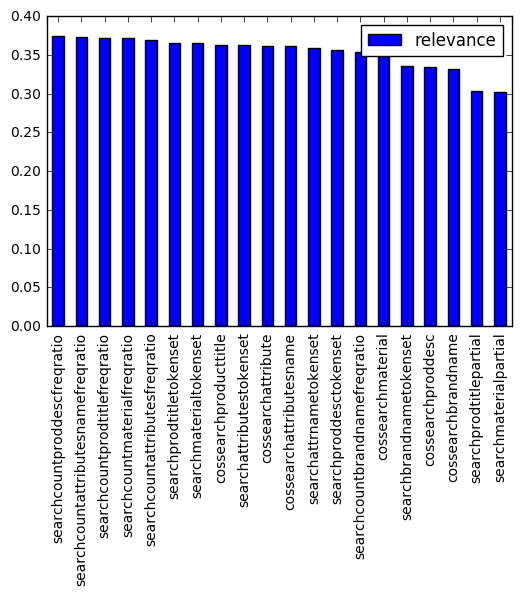

In [183]:
#Bar graph of above 20 features with high correlation to relevance.
%matplotlib inline
corr_matrix_relevance.plot.bar()

#corr_matrix_relevance.plot(x='feature', y='relevance', kind='bar')


## Run Randomforestregressor on train data and predict test data relevance using GridsearchCV


In [187]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = [
    #{'n_estimators': [100, 200, 300, 400], 'max_depth': [6, 8, 10, 12]}
  {'n_estimators': [200, 300, 400], 'max_depth': [10, 12, 14], 'min_samples_split' : [250,500,750], 'max_features' : ['auto','sqrt','log2']} 
    
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=3, n_jobs=-1,
                           scoring='mean_squared_error')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [200, 300, 400], 'min_samples_split': [250, 500, 750], 'max_depth': [10, 12, 14], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [188]:
#Finding grid search best params
grid_search.best_params_


{'max_depth': 14,
 'max_features': 'auto',
 'min_samples_split': 250,
 'n_estimators': 400}

In [189]:
#Finding grid search best estimator
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=250, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [190]:
#Printing RMSE scores for different estimators and depth combinations
for params, mean_score, scores in grid_search.grid_scores_:
    print(np.sqrt(-mean_score), np.sqrt(-scores).std(), params)


(0.47285266570042284, 0.0099179831647519465, {'max_features': 'auto', 'min_samples_split': 250, 'n_estimators': 200, 'max_depth': 10})
(0.47280351330432258, 0.0098898152201225917, {'max_features': 'auto', 'min_samples_split': 250, 'n_estimators': 300, 'max_depth': 10})
(0.47283996736080175, 0.0098468820708436898, {'max_features': 'auto', 'min_samples_split': 250, 'n_estimators': 400, 'max_depth': 10})
(0.47420189050587058, 0.0097505270381913409, {'max_features': 'auto', 'min_samples_split': 500, 'n_estimators': 200, 'max_depth': 10})
(0.47424225232200246, 0.0097057102946696248, {'max_features': 'auto', 'min_samples_split': 500, 'n_estimators': 300, 'max_depth': 10})
(0.47432013545539869, 0.0097967874905301247, {'max_features': 'auto', 'min_samples_split': 500, 'n_estimators': 400, 'max_depth': 10})
(0.47549212439591632, 0.0098534601072629621, {'max_features': 'auto', 'min_samples_split': 750, 'n_estimators': 200, 'max_depth': 10})
(0.47541363483439364, 0.0096934125326663383, {'max_feat

In [191]:
#Use the best estimator for randomforest regressor to predict


from sklearn.ensemble import RandomForestRegressor
#clf = RandomForestRegressor(n_estimators=400,max_depth = 16)

clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
# Fit model to training data



y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

from sklearn.metrics import mean_squared_error
RMSEtrain = mean_squared_error(y_train, y_train_predict)**0.5

print y_train_predict
print RMSEtrain



[ 2.33529459  1.95331495  2.38017378 ...,  2.17824803  2.2364123
  2.48027066]
0.443879615177


In [192]:
#Creating the data files for kaggle submission and checking for data

submission = pd.DataFrame({"product_uid": train1["product_uid"], "relevance": y_train_predict})
submission.to_csv("python_train_submisstion_check.csv", index=False)

submission = pd.DataFrame({"product_uid": test1["product_uid"], "relevance": y_test_predict})
submission.to_csv("python_test_submisstion_check.csv", index=False)

submission = pd.DataFrame({"id": train1["id"], "relevance": y_train_predict})
submission.to_csv("python_train_submisstion.csv", index=False)

submission = pd.DataFrame({"id": test1["id"], "relevance": y_test_predict})
submission.to_csv("python_test_submisstion.csv", index=False)



In [193]:

gradientdescentparam_grid = [
   #{'n_estimators': [100, 200, 300, 400], 'max_depth': [6, 8, 10, 12]}
    {'n_estimators': [200, 300, 400], 'max_depth': [10, 12, 14], 'min_samples_split' : [250,500,750], 'max_features' : ['auto','sqrt','log2']} 
  ]



In [194]:

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gradientboost_reg = GradientBoostingRegressor()

grid_search = GridSearchCV(gradientboost_reg, gradientdescentparam_grid, cv=3, n_jobs  = -1, 
                           scoring='mean_squared_error')f

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [200, 300, 400], 'min_samples_split': [250, 500, 750], 'max_depth': [10, 12, 14], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [195]:

grid_search.best_params_


{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 500,
 'n_estimators': 200}

In [196]:

grid_search.best_estimator_


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [197]:


clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
# Fit model to training data



y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

from sklearn.metrics import mean_squared_error
RMSEtrain = mean_squared_error(y_train, y_train_predict)**0.5

print y_train_predict
print RMSEtrain

submission = pd.DataFrame({"id": train1["id"], "relevance": y_train_predict})
submission.to_csv("python_train_submisstion_gd.csv", index=False)

submission = pd.DataFrame({"id": test1["id"], "relevance": y_test_predict})
submission.to_csv("python_test_submisstion_gd.csv", index=False)




[ 2.49973975  2.0204407   2.52411279 ...,  2.2297933   2.15559067
  2.39115495]
0.412997362105


In [198]:

#submission = pd.DataFrame({"id": test1["id"] , "relevance": y_test_predict})
#submission.to_csv("python_test_submisstion.csv", index=False)


In [199]:

submission.ix[submission.relevance>3, 'relevance'] = 3
submission.ix[submission.relevance<1, 'relevance'] = 1
submission.to_csv("python_test_submisstion_gd.csv", index=False)


In [200]:
"""
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = [
       {'n_estimators': [200, 300, 400], 'max_depth': [10, 12, 14], 'min_samples_split' : [250,500,750], 'max_features' : ['auto','sqrt','log2']} 
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=3, n_jobs=-1,
                           scoring='mean_squared_error')

grid_search.fit(X_train, y_train)

"""


"\nfrom sklearn.grid_search import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n\nparam_grid = [\n       {'n_estimators': [200, 300, 400], 'max_depth': [10, 12, 14], 'min_samples_split' : [250,500,750], 'max_features' : ['auto','sqrt','log2']} \n  ]\n\nforest_reg = RandomForestRegressor()\n\ngrid_search = GridSearchCV(forest_reg, param_grid, cv=3, n_jobs=-1,\n                           scoring='mean_squared_error')\n\ngrid_search.fit(X_train, y_train)\n\n"

In [201]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 500,
 'n_estimators': 200}

In [202]:

clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
# Fit model to training data



y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

from sklearn.metrics import mean_squared_error
RMSEtrain = mean_squared_error(y_train, y_train_predict)**0.5

print y_train_predict
print RMSEtrain

#submission = pd.DataFrame({"id": train1["id"], "relevance": y_train_predict})
#submission.to_csv("python_train_submisstion_rf_moreparm_nowordvecsim.csv", index=False)

submission = pd.DataFrame({"id": test1["id"], "relevance": y_test_predict})
submission.to_csv("python_test_submisstion_rf_moreparm_nowordvecsim.csv", index=False)

[ 2.52015792  2.004837    2.58311627 ...,  2.25378301  2.13663365
  2.3337467 ]
0.412514440657
